<a href="https://colab.research.google.com/github/sunil1206/Data-science/blob/main/FEATUREREDUCTION_USING_CORRELATION%26PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data =pd.read_csv('/content/cost-of-living.csv',index_col='Unnamed: 0')

In [ ]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, Meal, Inexpensive Restaurant to International Primary School, Yearly for 1 Child
Data columns (total 160 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Saint Petersburg, Russia            55 non-null     float64
 1   Istanbul, Turkey                    55 non-null     float64
 2   Izmir, Turkey                       55 non-null     float64
 3   Helsinki, Finland                   55 non-null     float64
 4   Chisinau, Moldova                   55 non-null     float64
 5   Milan, Italy                        55 non-null     float64
 6   Cairo, Egypt                        55 non-null     float64
 7   Banja Luka, Bosnia And Herzegovina  55 non-null     float64
 8   Baku, Azerbaijan                    55 non-null     float64
 9   Guadalajara, Mexico                 55 non-null     float64
 10  Kathmandu, Nepal                    55 non-

In [ ]:
data_transpose =data.transpose()
data_transpose

,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
"Saint Petersburg, Russia",7.34,29.35,4.40,2.20,2.20,0.76,0.53,0.98,0.71,1.18,7.60,0.63,5.87,0.88,1.89,2.20,0.59,3.96,42.56,0.67,19289.39,524.45,344.27,1012.53,615.19,102.17,0.03,6.96,26.27,18.33,5.14,71.86,38.25,74.88,100.72,2476.05,1507.70,645.94,10.29,1.47,0.26,4.40,1.29,1.25,0.56,0.86,1.96,0.92,1.91,0.89,0.48,7.18,19305.29,411.83,5388.86
"Istanbul, Turkey",4.58,15.28,3.82,3.06,3.06,0.64,0.24,0.71,0.36,1.62,5.32,0.33,7.64,1.79,2.48,2.75,0.41,3.50,31.32,1.05,24443.15,291.55,177.72,545.50,314.98,59.33,0.11,14.20,25.10,15.66,3.82,36.15,25.91,61.31,50.58,1315.18,657.05,436.00,19.08,0.76,0.47,3.59,0.85,0.86,0.59,0.61,1.84,1.30,0.80,1.91,0.62,9.73,20874.72,282.94,6905.43
"Izmir, Turkey",3.06,12.22,3.06,2.29,2.75,0.61,0.22,0.65,0.38,1.51,4.97,0.29,6.11,1.63,2.09,2.29,0.46,3.05,22.92,1.04,24443.15,212.22,128.36,353.76,225.34,51.07,0.09,12.89,20.64,11.67,3.06,33.20,22.48,52.74,42.20,856.54,508.14,392.07,22.23,0.61,0.57,3.51,0.77,0.73,0.52,0.57,1.56,1.31,0.70,1.78,0.58,8.61,20898.83,212.18,4948.41
"Helsinki, Finland",12.00,65.00,8.00,6.50,6.75,2.66,1.89,0.96,2.27,2.02,6.87,1.54,12.00,2.23,2.95,7.70,2.80,9.42,59.70,1.54,22000.00,986.93,758.13,1819.32,1271.16,82.66,0.07,22.31,34.54,24.72,14.00,83.41,31.41,82.49,120.97,7444.54,4099.36,2382.56,1.38,6.00,1.00,47.04,2.10,1.75,0.91,2.30,3.87,2.13,2.91,1.61,1.25,12.34,24402.77,351.60,1641.00
"Chisinau, Moldova",4.67,20.74,4.15,1.04,1.43,0.64,0.44,0.68,0.33,1.11,5.79,0.59,3.61,0.77,1.38,1.56,0.10,3.55,9.33,0.98,16335.12,244.49,177.96,428.67,330.84,113.46,0.07,8.58,26.64,12.10,5.19,56.54,35.37,86.25,94.38,904.82,589.13,286.95,9.42,1.30,0.18,3.11,0.70,1.22,0.56,0.84,1.25,0.93,1.56,1.37,0.59,5.37,17238.13,210.52,2679.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Melbourne, Australia",10.22,49.54,7.12,5.57,5.57,1.91,1.70,0.90,1.88,2.85,6.12,1.28,9.29,3.13,3.37,19.01,2.72,6.64,95.36,0.9

In [ ]:
data_transpose.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, Saint Petersburg, Russia to Quito, Ecuador
Data columns (total 55 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Meal, Inexpensive Restaurant                                                160 non-null    float64
 1   Meal for 2 People, Mid-range Restaurant, Three-course                       160 non-null    float64
 2   McMeal at McDonalds (or Equivalent Combo Meal)                              160 non-null    float64
 3   Domestic Beer (0.5 liter draught)                                           160 non-null    float64
 4   Imported Beer (0.33 liter bottle)                                           160 non-null    float64
 5   Coke/Pepsi (0.33 liter bottle)                                              160 non-null    float64
 6   Water (0.33 liter bot

**Feature Reduction Using Correlation**

In [ ]:
corr_matrix =data_transpose.corr()
corr_matrix

,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),Eggs (regular) (12),Local Cheese (1kg),Water (1.5 liter bottle),Bottle of Wine (Mid-Range),Domestic Beer (0.5 liter bottle),Imported Beer (0.33 liter bottle),Cigarettes 20 Pack (Marlboro),One-way Ticket (Local Transport),"Chicken Breasts (Boneless, Skinless), (1kg)",Monthly Pass (Regular Price),Gasoline (1 liter),Volkswagen Golf,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,"Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment",1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"Internet (60 Mbps or More, Unlimited Data, Cable/ADSL)","Fitness Club, Monthly Fee for 1 Adult",Tennis Court Rent (1 Hour on Weekend),"Cinema, International Release, 1 Seat",1 Pair of Jeans (Levis 501 Or Similar),"1 Summer Dress in a Chain Store (Zara, H&M, ...)",1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Taxi Start (Normal Tariff),Taxi 1km (Normal Tariff),Taxi 1hour Waiting (Normal Tariff),Apples (1kg),Oranges (1kg),Potato (1kg),Lettuce (1 head),Cappuccino (regular),"Rice (white), (1kg)",Tomato (1kg),Banana (1kg),Onion (1kg),Beef Round (1kg) (or Equivalent Back Leg Red Meat),Toyota Corolla 1.6l 97kW Comfort (Or Equivalent New Car),"Preschool (or Kindergarten), Full Day, Private, Monthly for 1 Child","International Primary School, Yearly for 1 Child"
"Meal, Inexpensive Restaurant",1.000000,0.920283,0.879086,0.715290,0.611349,0.857994,0.851898,0.216713,0.766239,0.805795,0.507450,0.671487,0.182344,0.311041,0.185446,0.676235,0.854055,0.845885,0.792211,0.351383,0.165616,0.775145,0.807768,0.706323,0.767935,0.558030,0.488834,0.589663,0.430433,0.578963,0.866298,0.563066,0.255767,0.470064,0.738633,0.466693,0.524937,0.825456,-0.458103,0.772927,0.719941,0.869839,0.483527,0.600204,0.662776,0.714468,0.670967,0.661068,0.738921,0.568898,0.635462,0.656815,0.099815,0.762257,0.620160
"Meal for 2 People, Mid-range Restaurant, Three-course",0.920283,1.000000,0.893975,0.812823,0.715333,0.834237,0.828917,0.331572,0.813498,0.852472,0.560579,0.699878,0.337050,0.405110,0.265925,0.655348,0.854637,0.861450,0.791344,0.351694,0.232159,0.805347,0.828088,0.749988,0.804179,0.519182,0.441215,0.643641,0.560912,0.694979,0.903633,0.612681,0.345668,0.558780,0.796064,0.536025,0.594330,0.821908,-0.491268,0.817747,0.730607,0.893139,0.510199,0.610111,0.670628,0.778021,0.776176,0.668756,0.753682,0.606675,0.643318,0.686807,0.135740,0.700149,0.609628
McMeal at McDonalds (or Equivalent Combo Meal),0.879086,0.893975,1.000000,0.741438,0.650609,0.835094,0.821316,0.268769,0.727555,0.816253,0.547879,0.595888,0.274312,0.359077,0.266788,0.613992,0.787714,0.823449,0.687244,0.417654,0.274633,0.671467,0.703090,0.608668,0.672660,0.524263,0.433115,0.531673,0.513521,0.625876,0.826971,0.610910,0.345976,0.545450,0.709826,0.457097,0.519607,0.718426,-0.471189,0.792474,0.698457,0.839968,0.459810,0.489307,0.577107,0.676290,0.666189,0.548057,0.616062,0.579723,0.550347,0.691502,0.230600,0.615557,0.506310
Domestic Beer (0.5 liter draught),0.715290,0.812823,0.741438,1.000000,0.954140,0.614633,0.587440,0.398290,0.676835,0.736913,0.477792,0.572658,0.584265,0.751390,0.605685,0.647089,0.675235,0.686883,0.681690,0.189095,0.292388,0.738394,0.745773,0.710501,0.748535,0.374016,0.363677,0.674908,0.652276,0.598982,0.778152,0.398360,0.377849,0.391529,0.536537,0.509442,0.556055,0.756515,-0.411955,0.668892,0.478739,0.6

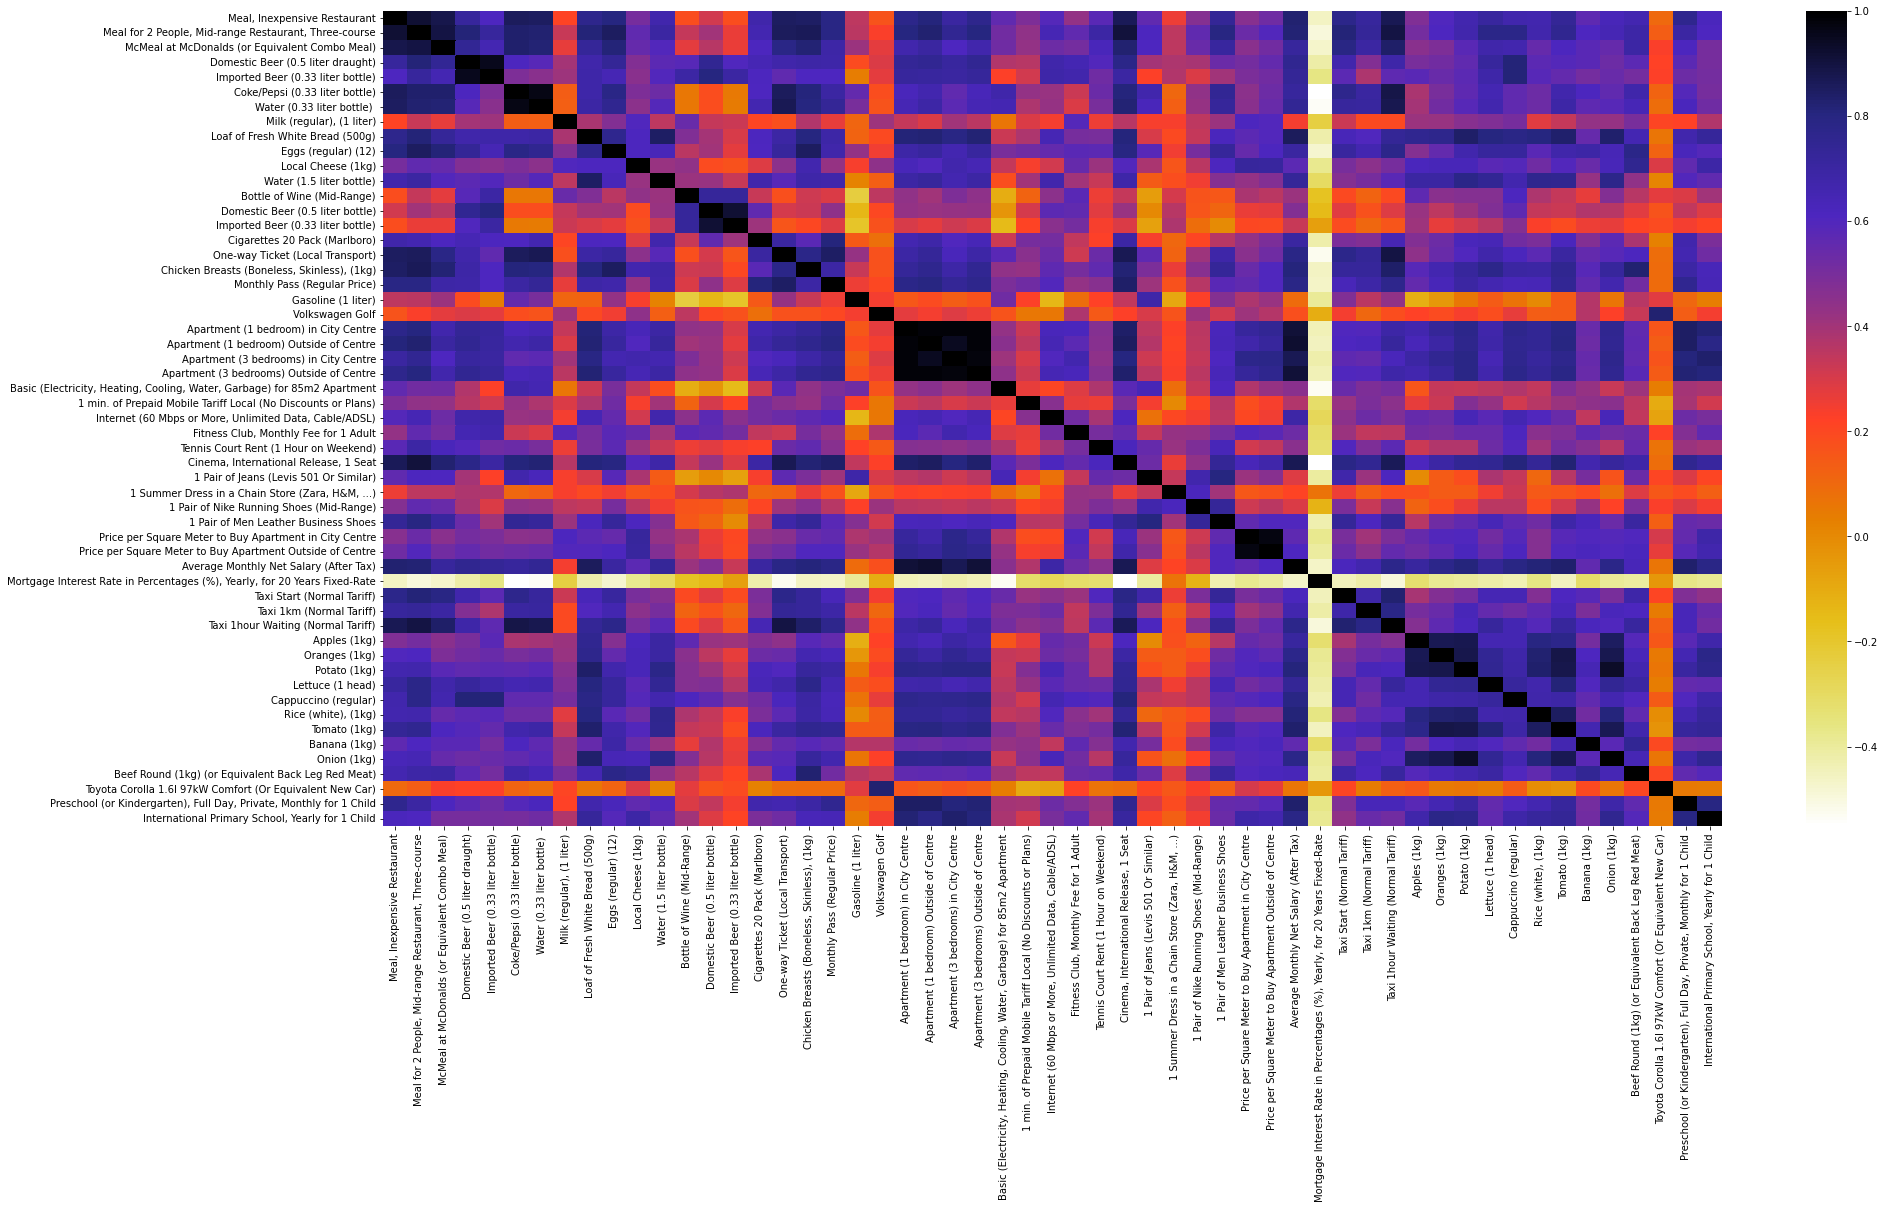

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(corr_matrix,cmap=plt.cm.CMRmap_r)

In [ ]:
col_corr =set()
for i in range(len(corr_matrix.columns)):
  for j in range(i):
    if abs(corr_matrix.iloc[i,j])>0.65:
       colname =corr_matrix.columns[i]
       col_corr.add(colname)

In [ ]:
len(col_corr)

46

In [ ]:
col_corr

{'1 Pair of Jeans (Levis 501 Or Similar)',
 '1 Pair of Men Leather Business Shoes',
 '1 Pair of Nike Running Shoes (Mid-Range)',
 'Apartment (1 bedroom) Outside of Centre',
 'Apartment (1 bedroom) in City Centre',
 'Apartment (3 bedrooms) Outside of Centre',
 'Apartment (3 bedrooms) in City Centre',
 'Apples (1kg)',
 'Average Monthly Net Salary (After Tax)',
 'Banana (1kg)',
 'Basic (Electricity, Heating, Cooling, Water, Garbage) for 85m2 Apartment',
 'Beef Round (1kg) (or Equivalent Back Leg Red Meat)',
 'Bottle of Wine (Mid-Range)',
 'Cappuccino (regular)',
 'Chicken Breasts (Boneless, Skinless), (1kg)',
 'Cigarettes 20 Pack (Marlboro)',
 'Cinema, International Release, 1 Seat',
 'Coke/Pepsi (0.33 liter bottle)',
 'Domestic Beer (0.5 liter bottle)',
 'Domestic Beer (0.5 liter draught)',
 'Eggs (regular) (12)',
 'Fitness Club, Monthly Fee for 1 Adult',
 'Imported Beer (0.33 liter bottle)',
 'International Primary School, Yearly for 1 Child',
 'Internet (60 Mbps or More, Unlimited Data

In [ ]:
data_feature_reduction=data_transpose.drop(col_corr,axis=1)
data_feature_reduction

,"Meal, Inexpensive Restaurant","Milk (regular), (1 liter)",Local Cheese (1kg),Gasoline (1 liter),Volkswagen Golf,1 min. of Prepaid Mobile Tariff Local (No Discounts or Plans),"1 Summer Dress in a Chain Store (Zara, H&M, ...)","Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate"
"Saint Petersburg, Russia",7.34,0.98,7.60,0.67,19289.39,0.03,38.25,10.29
"Istanbul, Turkey",4.58,0.71,5.32,1.05,24443.15,0.11,25.91,19.08
"Izmir, Turkey",3.06,0.65,4.97,1.04,24443.15,0.09,22.48,22.23
"Helsinki, Finland",12.00,0.96,6.87,1.54,22000.00,0.07,31.41,1.38
"Chisinau, Moldova",4.67,0.68,5.79,0.98,16335.12,0.07,35.37,9.42
...,...,...,...,...,...,...,...,...
"Melbourne, Australia",10.22,0.90,6.12,0.91,15479.87,0.12,36.07,4.11
"Perth, Australia",12.43,1.03,6.52,0.87,16149.98,0.32,32.49,4.31
"Sydney, Australia",11.81,0.90,7.68,0.93,15845.50,0.38,38.11,3.82
"Alexandria, Egypt",2.81,0.81,3.68,0.39,23626.73,0.01,40.48,16.17


In [ ]:
data_feature_reduction.shape

(160, 8)

In [ ]:
data_transpose.shape

(160, 55)

**Feature Reduction Using PCA**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar =StandardScaler()
scalar.fit(data_transpose)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
data_scaled =scalar.transform(data_transpose)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca =PCA(n_components= 8)
pca.fit(data_scaled)


PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
data_pca_reduction =pca.transform(data_scaled)

In [ ]:
data_pca_reduction.shape

(160, 8)

In [ ]:
pd.DataFrame(data_pca_reduction)


,0,1,2,3,4,5,6,7
0,-3.235331,-0.543199,0.711647,0.148833,-1.209971,1.637835,0.187349,0.044313
1,-4.731378,0.930841,0.602579,-0.294201,0.591622,-0.789826,-0.499287,0.576867
2,-5.927768,0.871958,-0.041997,0.094701,0.903553,-0.963309,-0.900671,0.545063
3,5.985963,-1.932937,1.062906,-2.274677,0.728120,-0.774677,-0.835137,-2.281042
4,-5.066890,-1.305648,0.177637,0.203900,-1.393593,0.645621,0.266195,0.623759
...,...,...,...,...,...,...,...,...
155,5.681482,1.120175,-1.486978,-1.936545,1.470822,-0.261717,1.030922,1.659452
156,4.970240,0.899175,-1.654894,-3.091438,1.371476,-1.716606,0.727823,2.325793
157,7.319502,1.164979,-1.587873,-2.158596,1.761722,-0.757492,1.441942,3.911312
158,-6.791162,1.263528,1.731257,-0.871510,-1.297935,1.624480,-1.766936,1.338131
